# Setup

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import fiona

In [2]:
gdb_file = "ECMC_CSM_Flowline_Data_Access/COGCC_Form44_Off_Location_Flowlines_Approved_CONFIDENTIAL.gdb"
gdf = gpd.read_file(gdb_file)

In [3]:
gdb_file = "ECMC_CSM_Flowline_Data_Access/COGCC_Form44_Crude_Oil_Produced_Water_Transfer_Flowlines_Approved_CONFIDENTIAL.gdb"
gdf = gpd.read_file(gdb_file)

In [4]:
# List all layers in the GDB
layers = fiona.listlayers(gdb_file)
print(f"Layers in the GDB: {layers}")


Layers in the GDB: ['Crude_Oil_Produced_Water_Transfer_Lines', 'Crude_Oil_Produced_Water_Transfer_Line_Valves']


In [5]:

# Read and print the first few records of each layer
for layer in layers:
    data = gpd.read_file(gdb_file, layer=layer)
    print(f"Data in {layer}:")
    print(data.head())

# If you want to specifically read tables or non-spatial data, you can do so similarly:
# For the sake of this example, I'll assume there's a layer named 'some_table' which is a table.
# table_data = gpd.read_file(gdb_path, layer='some_table')
# print(table_data.head())

Data in Crude_Oil_Produced_Water_Transfer_Lines:
           Operator           Fluid      Material  Diam_in  Status  Length_ft  \
0        SIMCOE LLC  Produced Water  Carbon Steel    2.000  Active     531.01   
1        SIMCOE LLC  Produced Water    Fiberglass    3.000  Active    1916.17   
2        SIMCOE LLC  Produced Water    Fiberglass    3.000    None       4.56   
3        SIMCOE LLC  Produced Water    Fiberglass    3.000  Active       5.23   
4  NOBLE ENERGY INC  Produced Water     Flexsteel    8.625  Active     122.93   

     Doc_Num  SHAPE_Length                                           geometry  
0  402902791    161.921176  MULTILINESTRING ((239975.814 4103152.657, 2399...  
1  402870670    584.211077  MULTILINESTRING ((265499.034 4101255.110, 2654...  
2  402852005      1.389643  MULTILINESTRING ((266252.146 4109140.691, 2662...  
3  402902791      1.594278  MULTILINESTRING ((256997.527 4117598.038, 2569...  
4  403368004     37.456167  MULTILINESTRING ((538921.819 4444764

## Explore Data

In [6]:
# Listing layers in GDB
print(fiona.listlayers(gdb_file))

['Crude_Oil_Produced_Water_Transfer_Lines', 'Crude_Oil_Produced_Water_Transfer_Line_Valves']


In [7]:
# General Info
print(gdf.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 106799 entries, 0 to 106798
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   Operator      106799 non-null  object  
 1   Fluid         83557 non-null   object  
 2   Material      83039 non-null   object  
 3   Diam_in       83560 non-null   float64 
 4   Status        49659 non-null   object  
 5   Length_ft     106799 non-null  float64 
 6   Doc_Num       106799 non-null  int64   
 7   SHAPE_Length  106799 non-null  float64 
 8   geometry      106799 non-null  geometry
dtypes: float64(3), geometry(1), int64(1), object(4)
memory usage: 7.3+ MB
None


In [8]:
# Preview Data
print(gdf.head())

           Operator           Fluid      Material  Diam_in  Status  Length_ft  \
0        SIMCOE LLC  Produced Water  Carbon Steel    2.000  Active     531.01   
1        SIMCOE LLC  Produced Water    Fiberglass    3.000  Active    1916.17   
2        SIMCOE LLC  Produced Water    Fiberglass    3.000    None       4.56   
3        SIMCOE LLC  Produced Water    Fiberglass    3.000  Active       5.23   
4  NOBLE ENERGY INC  Produced Water     Flexsteel    8.625  Active     122.93   

     Doc_Num  SHAPE_Length                                           geometry  
0  402902791    161.921176  MULTILINESTRING ((239975.814 4103152.657, 2399...  
1  402870670    584.211077  MULTILINESTRING ((265499.034 4101255.110, 2654...  
2  402852005      1.389643  MULTILINESTRING ((266252.146 4109140.691, 2662...  
3  402902791      1.594278  MULTILINESTRING ((256997.527 4117598.038, 2569...  
4  403368004     37.456167  MULTILINESTRING ((538921.819 4444764.256, 5389...  


In [9]:
# Statistical Summary
print(gdf.describe())

           Diam_in      Length_ft       Doc_Num   SHAPE_Length
count  83560.00000  106799.000000  1.067990e+05  106799.000000
mean       4.12153    1140.394547  4.027313e+08     347.717539
std        2.12444    3125.105780  3.107862e+05     952.809191
min        0.00000       0.000000  4.016534e+08       0.000000
25%        3.00000       5.445000  4.026688e+08       1.658428
50%        3.00000     108.640000  4.028523e+08      33.121281
75%        4.50000    1289.640000  4.028937e+08     393.183811
max       36.00000  152023.900000  4.034925e+08   46342.379790


## Visualization

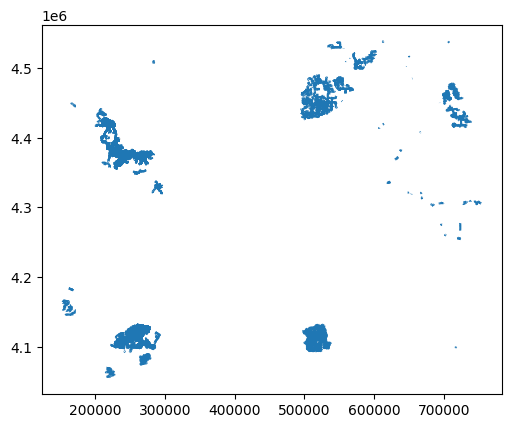

In [10]:
# Basic Plot
gdf.plot()
plt.show()

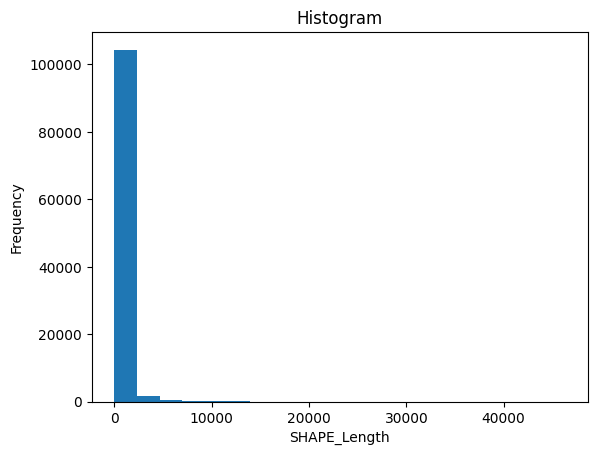

In [ ]:
# Histogram
gdf['SHAPE_Length'].plot(kind='hist', bins=20, xlim=1500)
plt.xlabel('SHAPE_Length')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

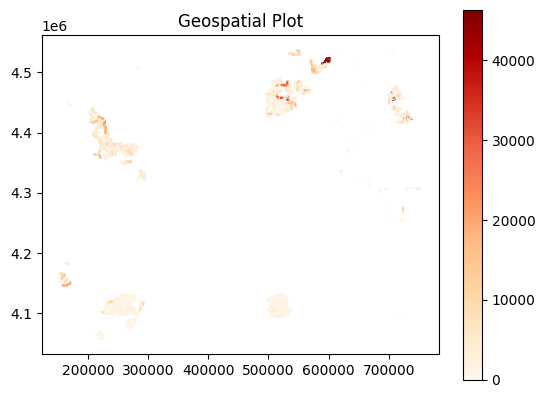

In [12]:
gdf.plot(column='SHAPE_Length', cmap='OrRd', legend=True)
plt.title('Geospatial Plot')
plt.show()

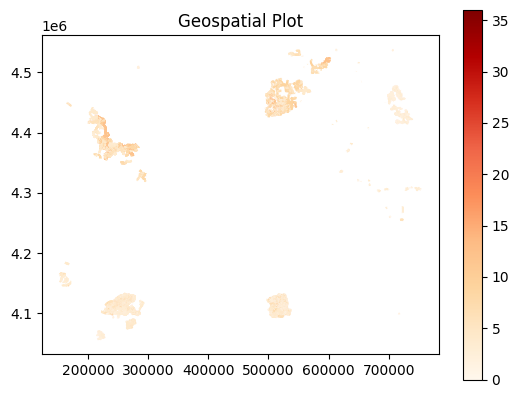

In [13]:
gdf.plot(column='Diam_in', cmap='OrRd', legend=True)
plt.title('Geospatial Plot')
plt.show()

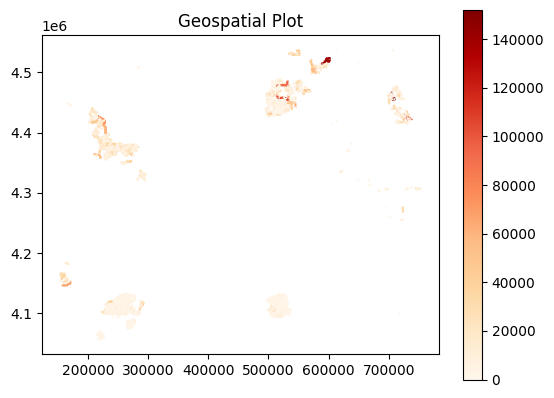

In [14]:
gdf.plot(column='Length_ft', cmap='OrRd', legend=True)
plt.title('Geospatial Plot')
plt.show()

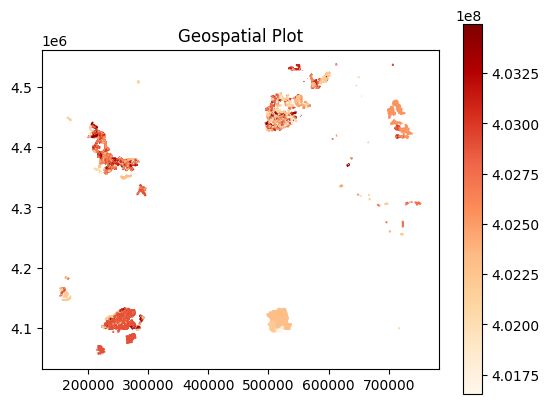

In [15]:
gdf.plot(column='Doc_Num', cmap='OrRd', legend=True)
plt.title('Geospatial Plot')
plt.show()